In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv")

In [3]:
sns.set(style="whitegrid")

In [4]:
df.drop(['rownames'], axis = 1, inplace = True)

In [5]:
df.head()

,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,0,786,190,10,0.1,0,3,0,0,0
1,0,794,182,10,0.0,0,3,0,0,0
2,0,798,178,20,0.0,0,1,0,0,0
3,0,800,176,70,0.3,0,1,0,1,0
4,0,804,172,40,0.3,0,1,0,1,0


Feature Description to get a better understanding

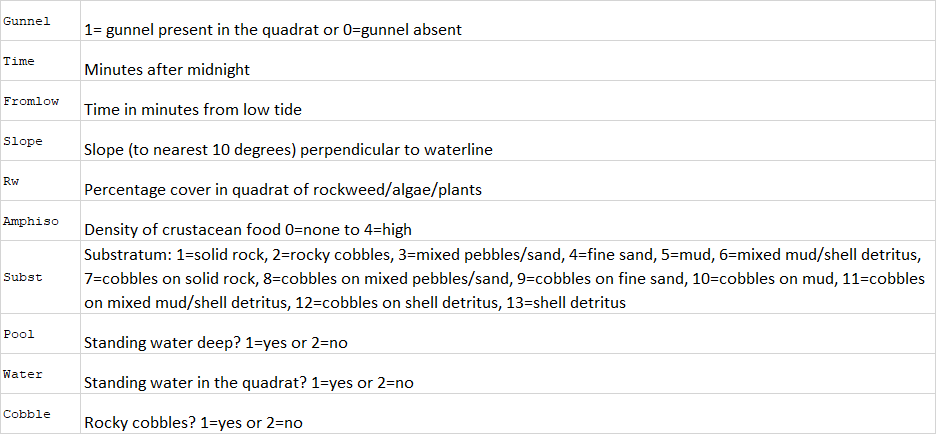

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gunnel   1592 non-null   int64  
 1   Time     1592 non-null   int64  
 2   Fromlow  1592 non-null   int64  
 3   Slope    1592 non-null   int64  
 4   Rw       1592 non-null   float64
 5   Amphiso  1592 non-null   int64  
 6   Subst    1592 non-null   int64  
 7   Pool     1592 non-null   int64  
 8   Water    1592 non-null   int64  
 9   Cobble   1592 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 124.5 KB


In [7]:
df.describe()

,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


In [8]:
#Convert Categorical Columns to Categories based on feature explanations
df['Gunnel'] = df['Gunnel'].astype('category')
df['Pool'] = df['Pool'].astype('category')
df['Water'] = df['Water'].astype('category')
df['Cobble'] = df['Cobble'].astype('category')
df['Subst'] = df['Subst'].astype('category')

In [9]:
df.head()

,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,0,786,190,10,0.1,0,3,0,0,0
1,0,794,182,10,0.0,0,3,0,0,0
2,0,798,178,20,0.0,0,1,0,0,0
3,0,800,176,70,0.3,0,1,0,1,0
4,0,804,172,40,0.3,0,1,0,1,0


In [10]:
#Checking for duplicates
df.duplicated().sum()

90

In [11]:
# Find columns with data type object or category
categorical_columns = df.columns[df.dtypes == 'category']
print("Categorical Variables:", categorical_columns)

Categorical Variables: Index(['Gunnel', 'Subst', 'Pool', 'Water', 'Cobble'], dtype='object')


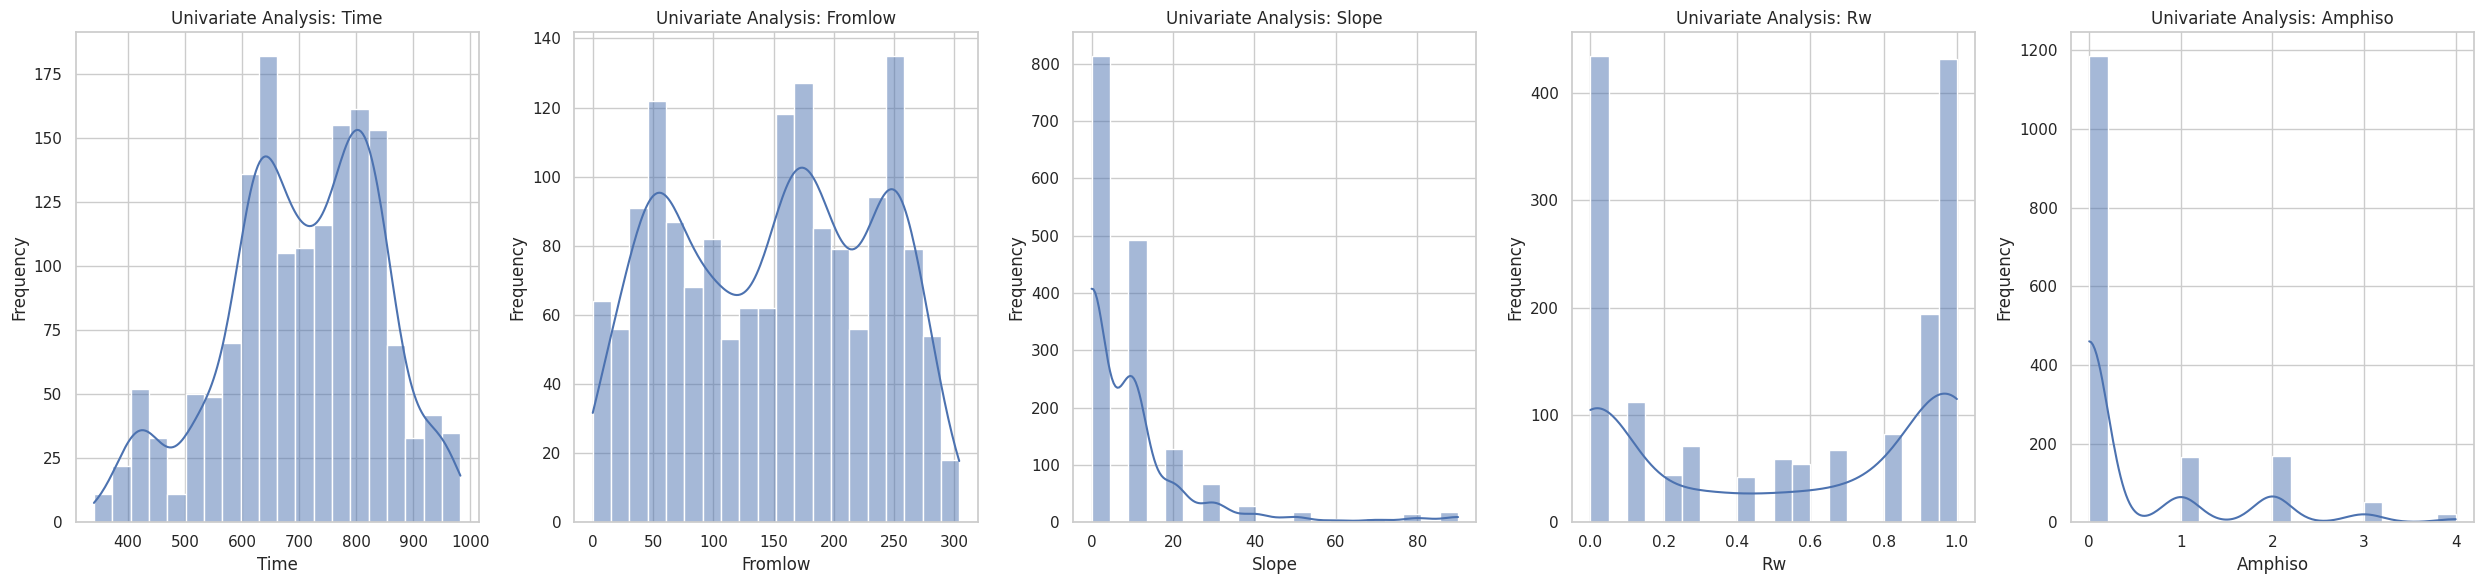

In [12]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Univariate Analysis: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

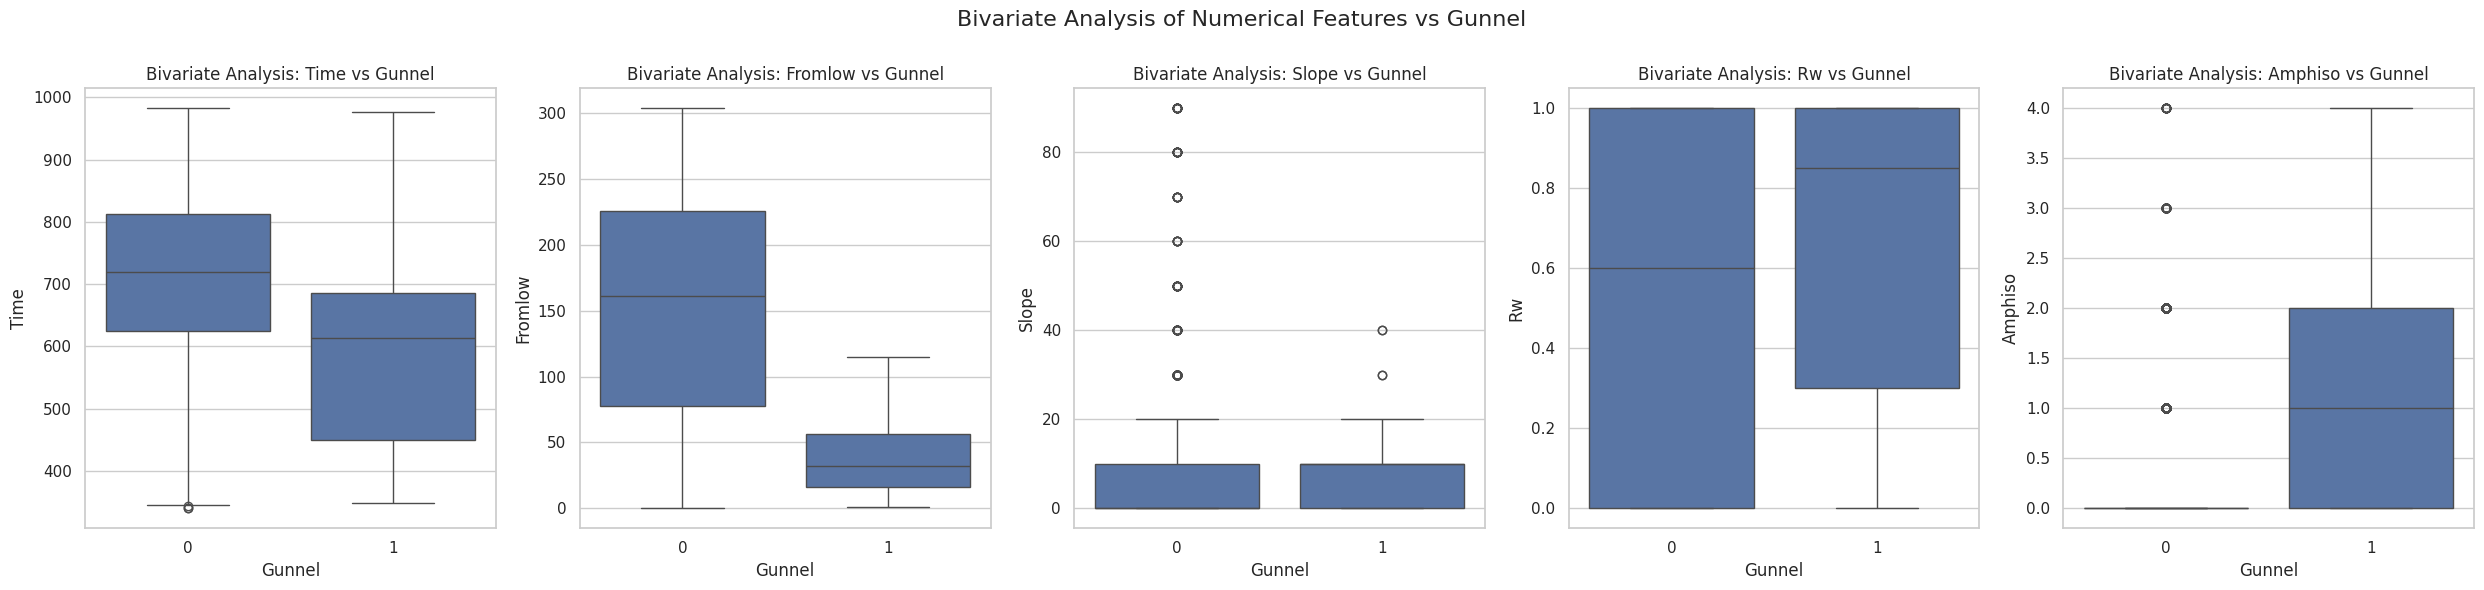

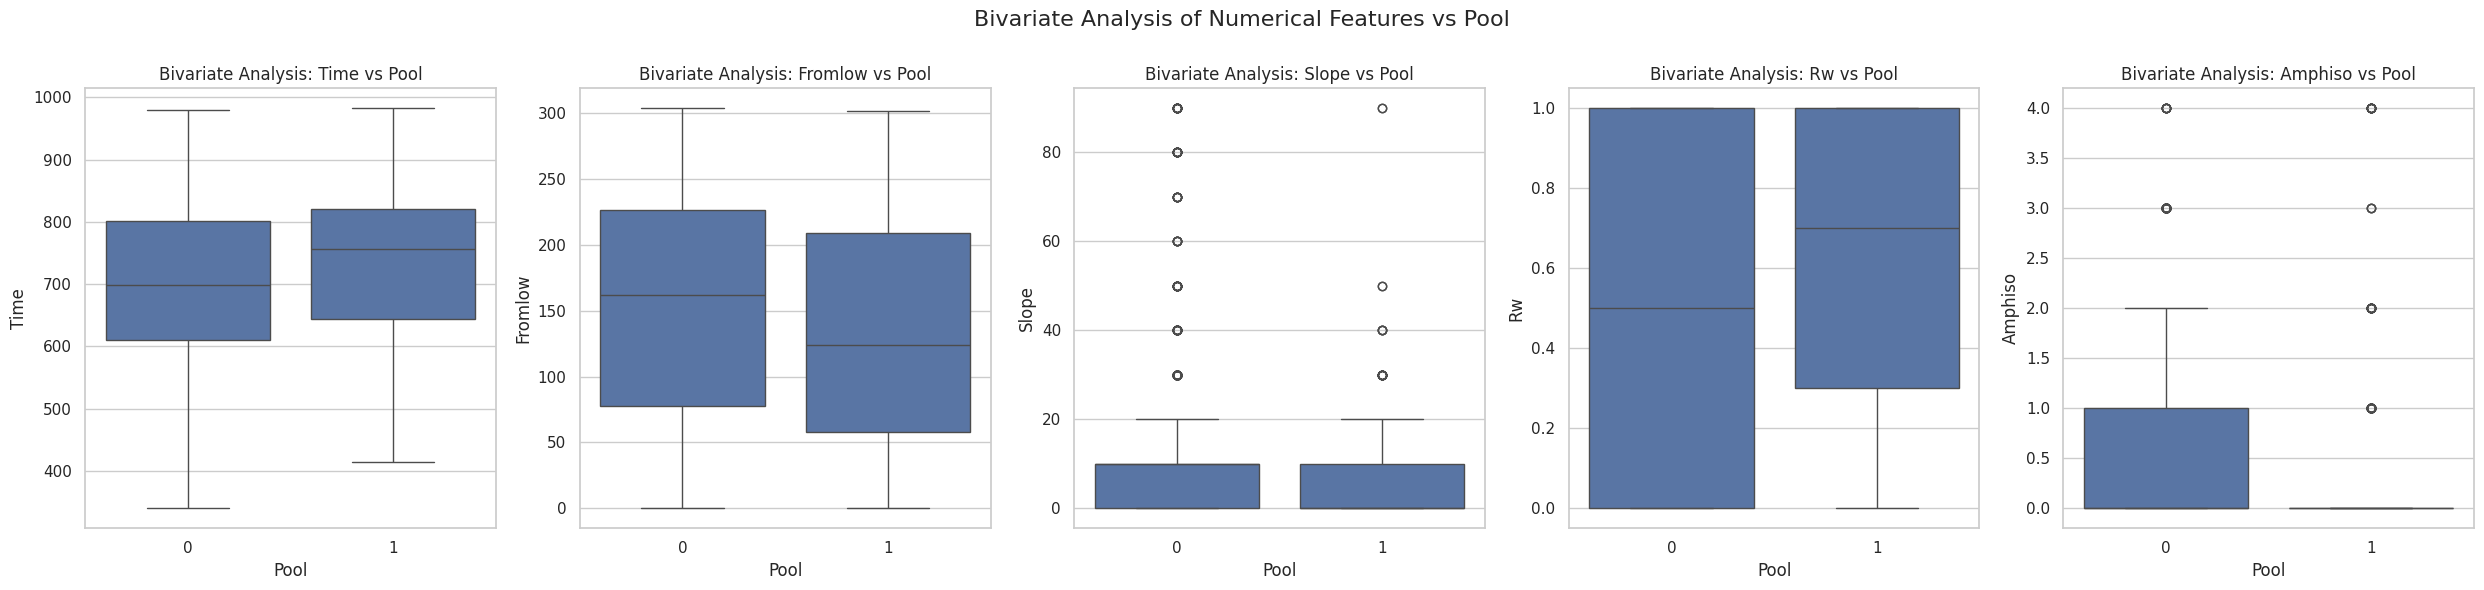

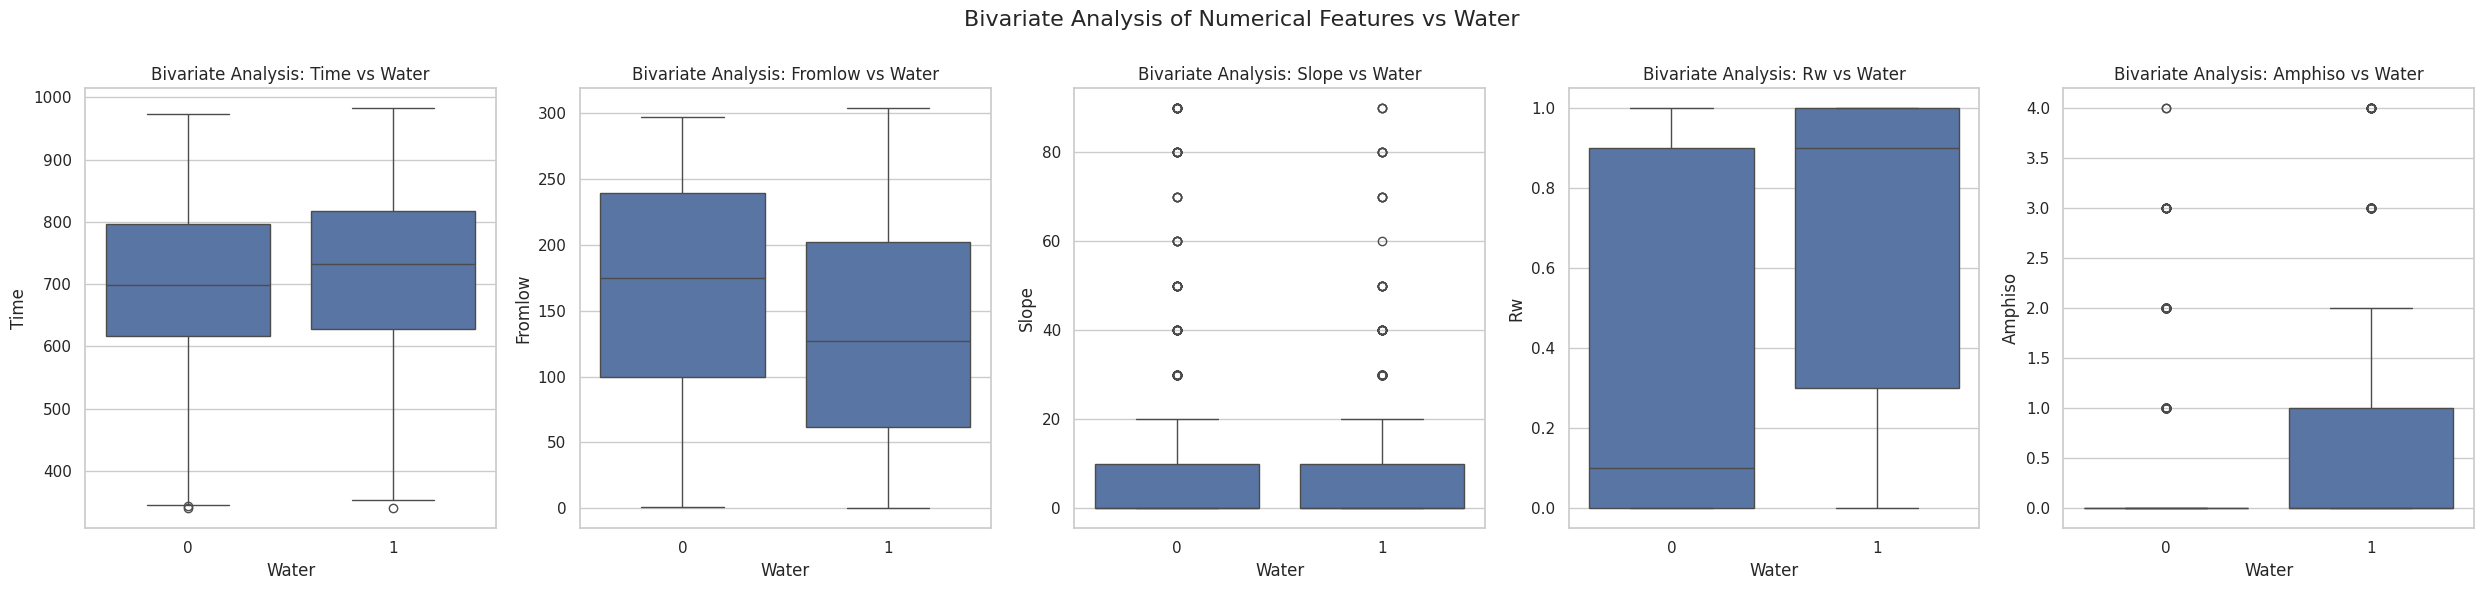

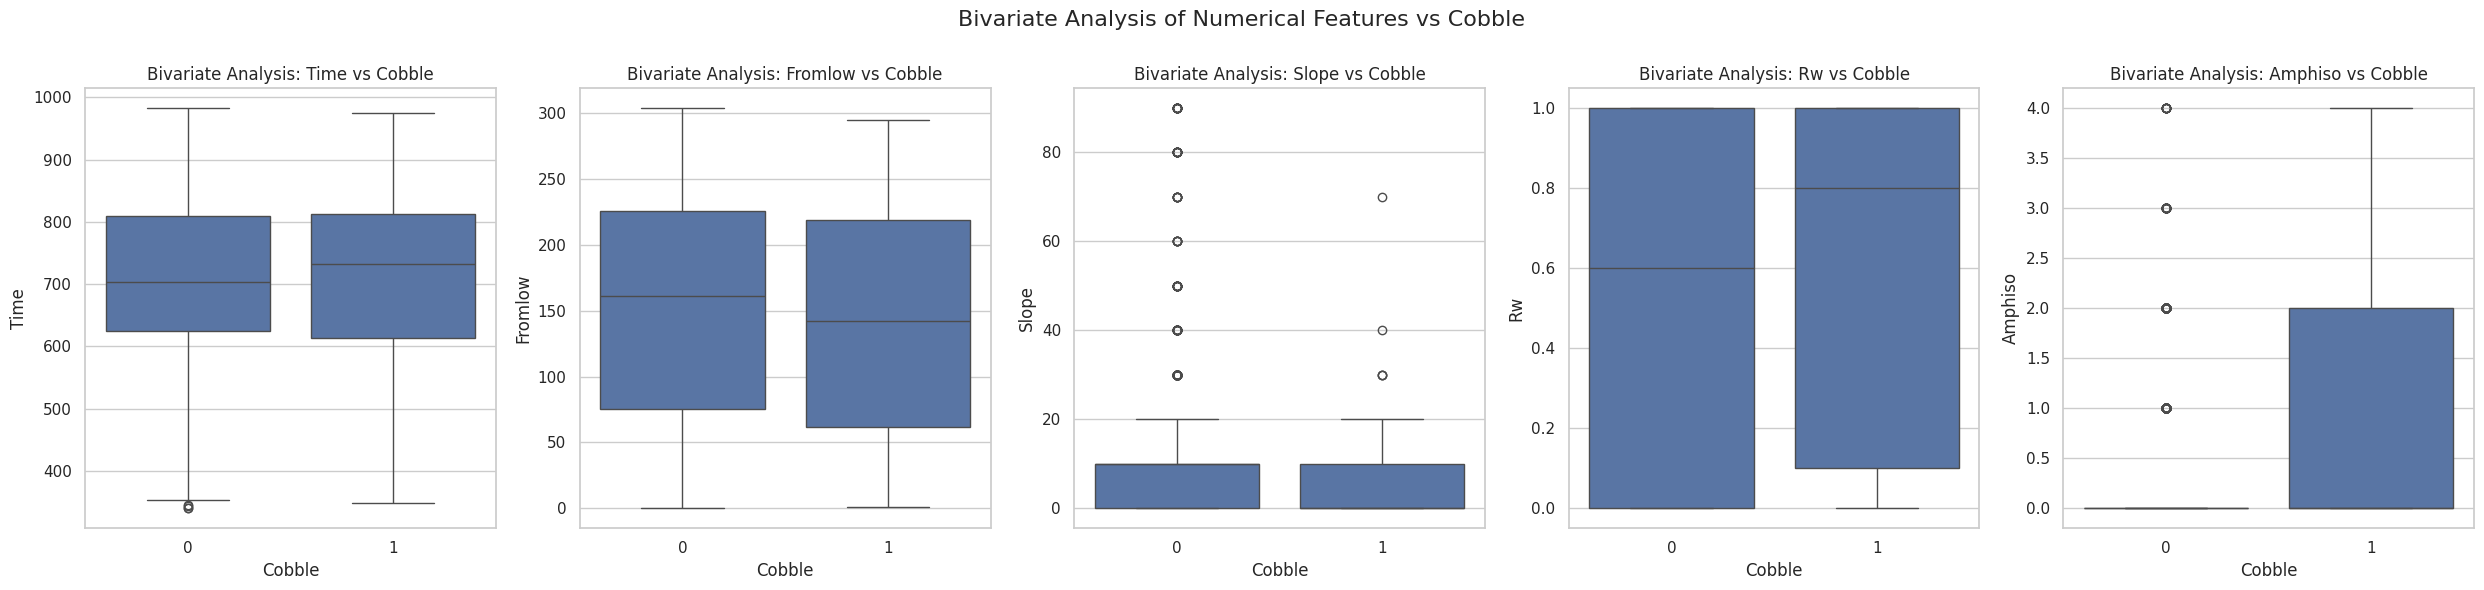

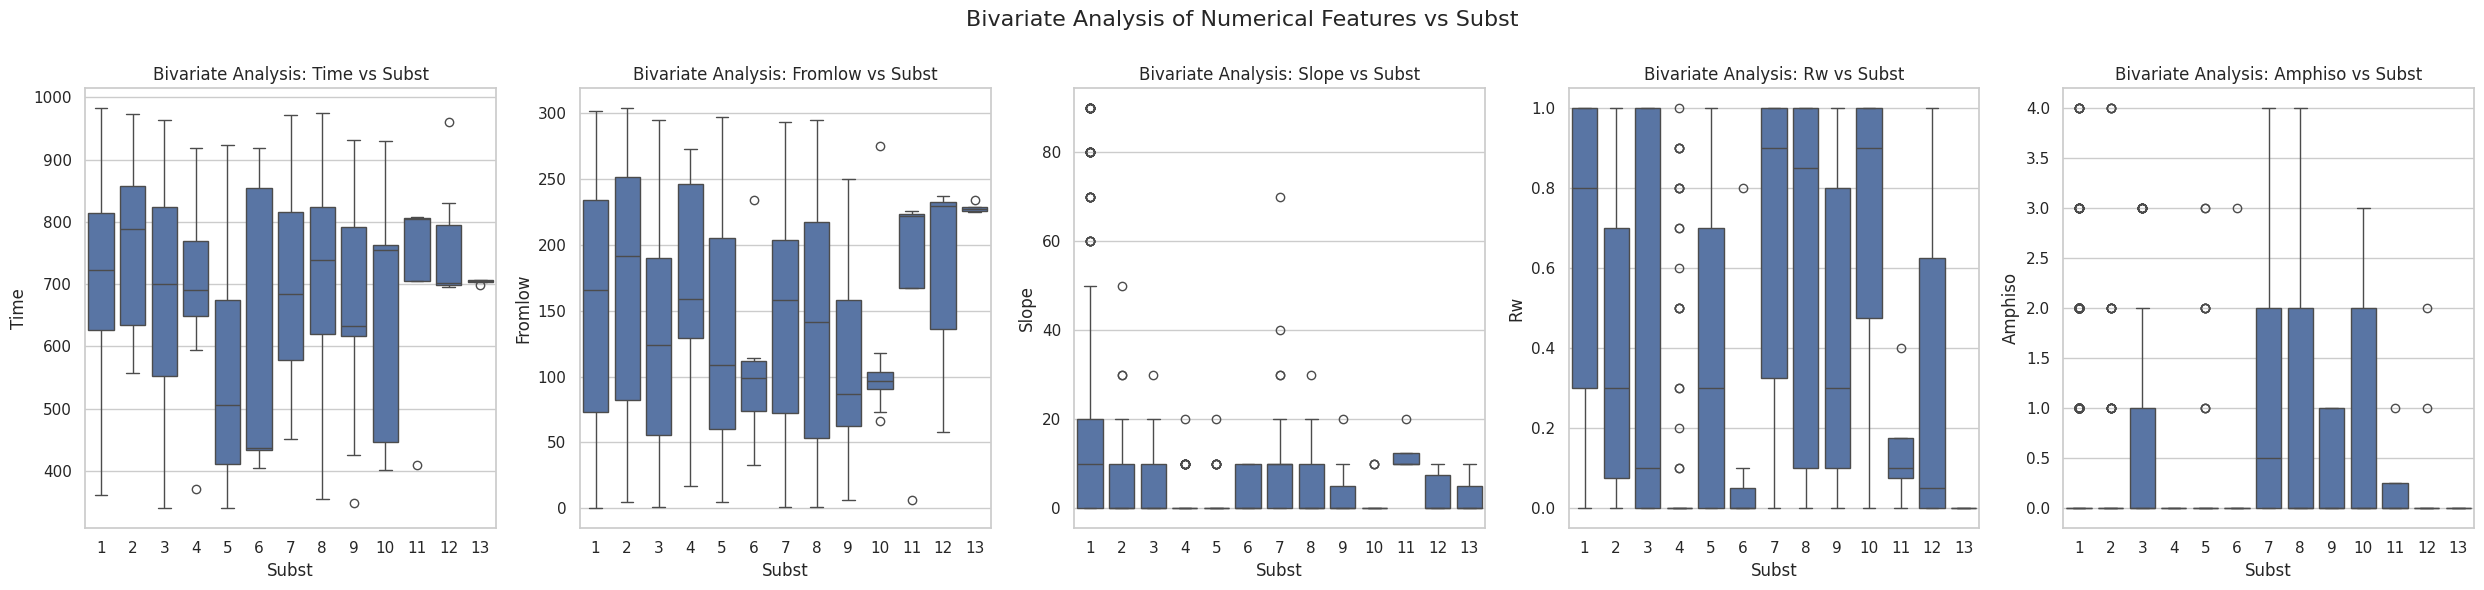

In [13]:
#Bivariate Analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = ['Gunnel', 'Pool', 'Water', 'Cobble', 'Subst']

# Create subplots for each numerical feature against categorical features
for cat_col in categorical_cols:
    num_plots = len(numerical_cols)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 6))

    for ax, num_col in zip(axes, numerical_cols):
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=ax)
        ax.set_title(f'Bivariate Analysis: {num_col} vs {cat_col}')
        ax.set_ylabel(num_col)

    plt.suptitle(f'Bivariate Analysis of Numerical Features vs {cat_col}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

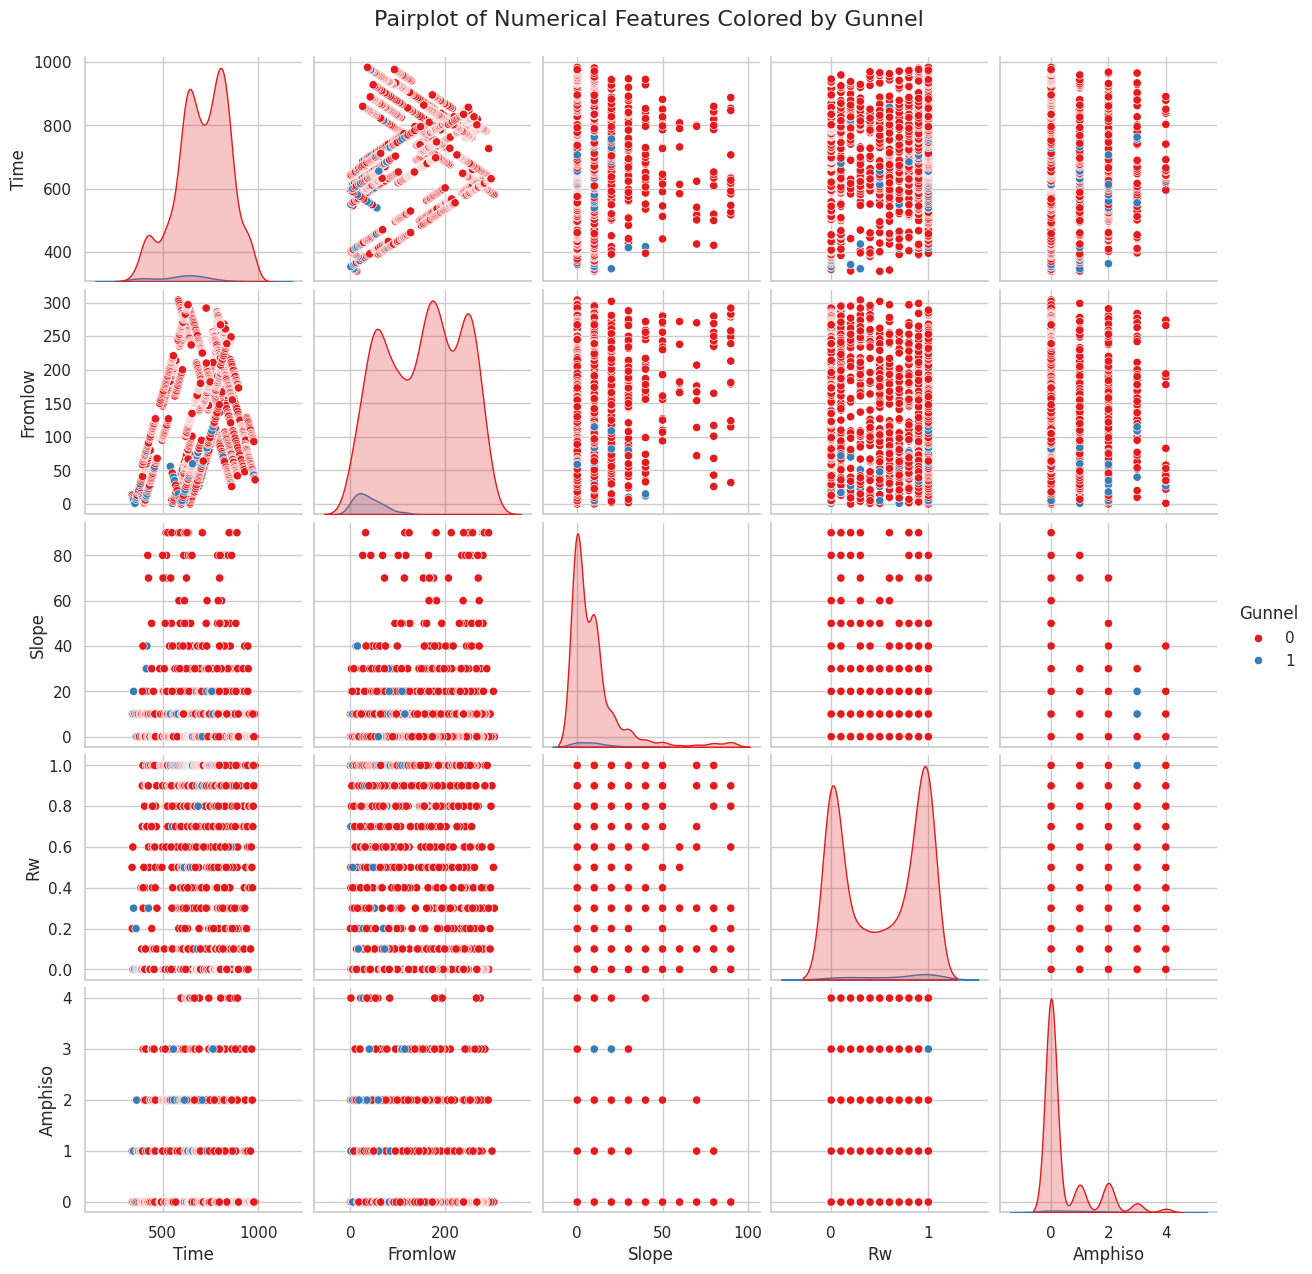

In [14]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Create pairplot colored by Gunnel
pairplot = sns.pairplot(df, vars=numerical_cols, hue='Gunnel', palette='Set1')
plt.suptitle('Pairplot of Numerical Features Colored by Gunnel', fontsize=16, y=1.02)
plt.show()

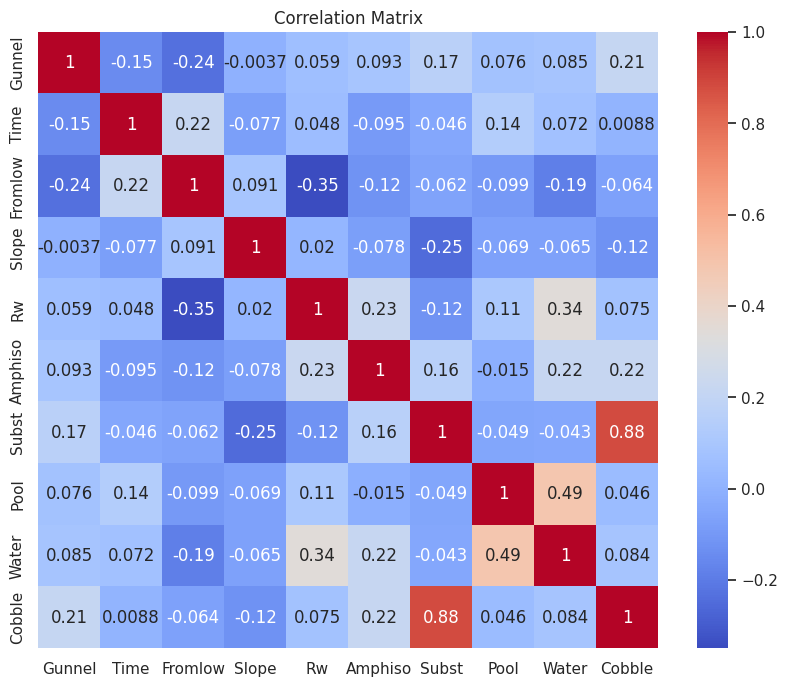

In [15]:
#Multivariate Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Time Series Analysis

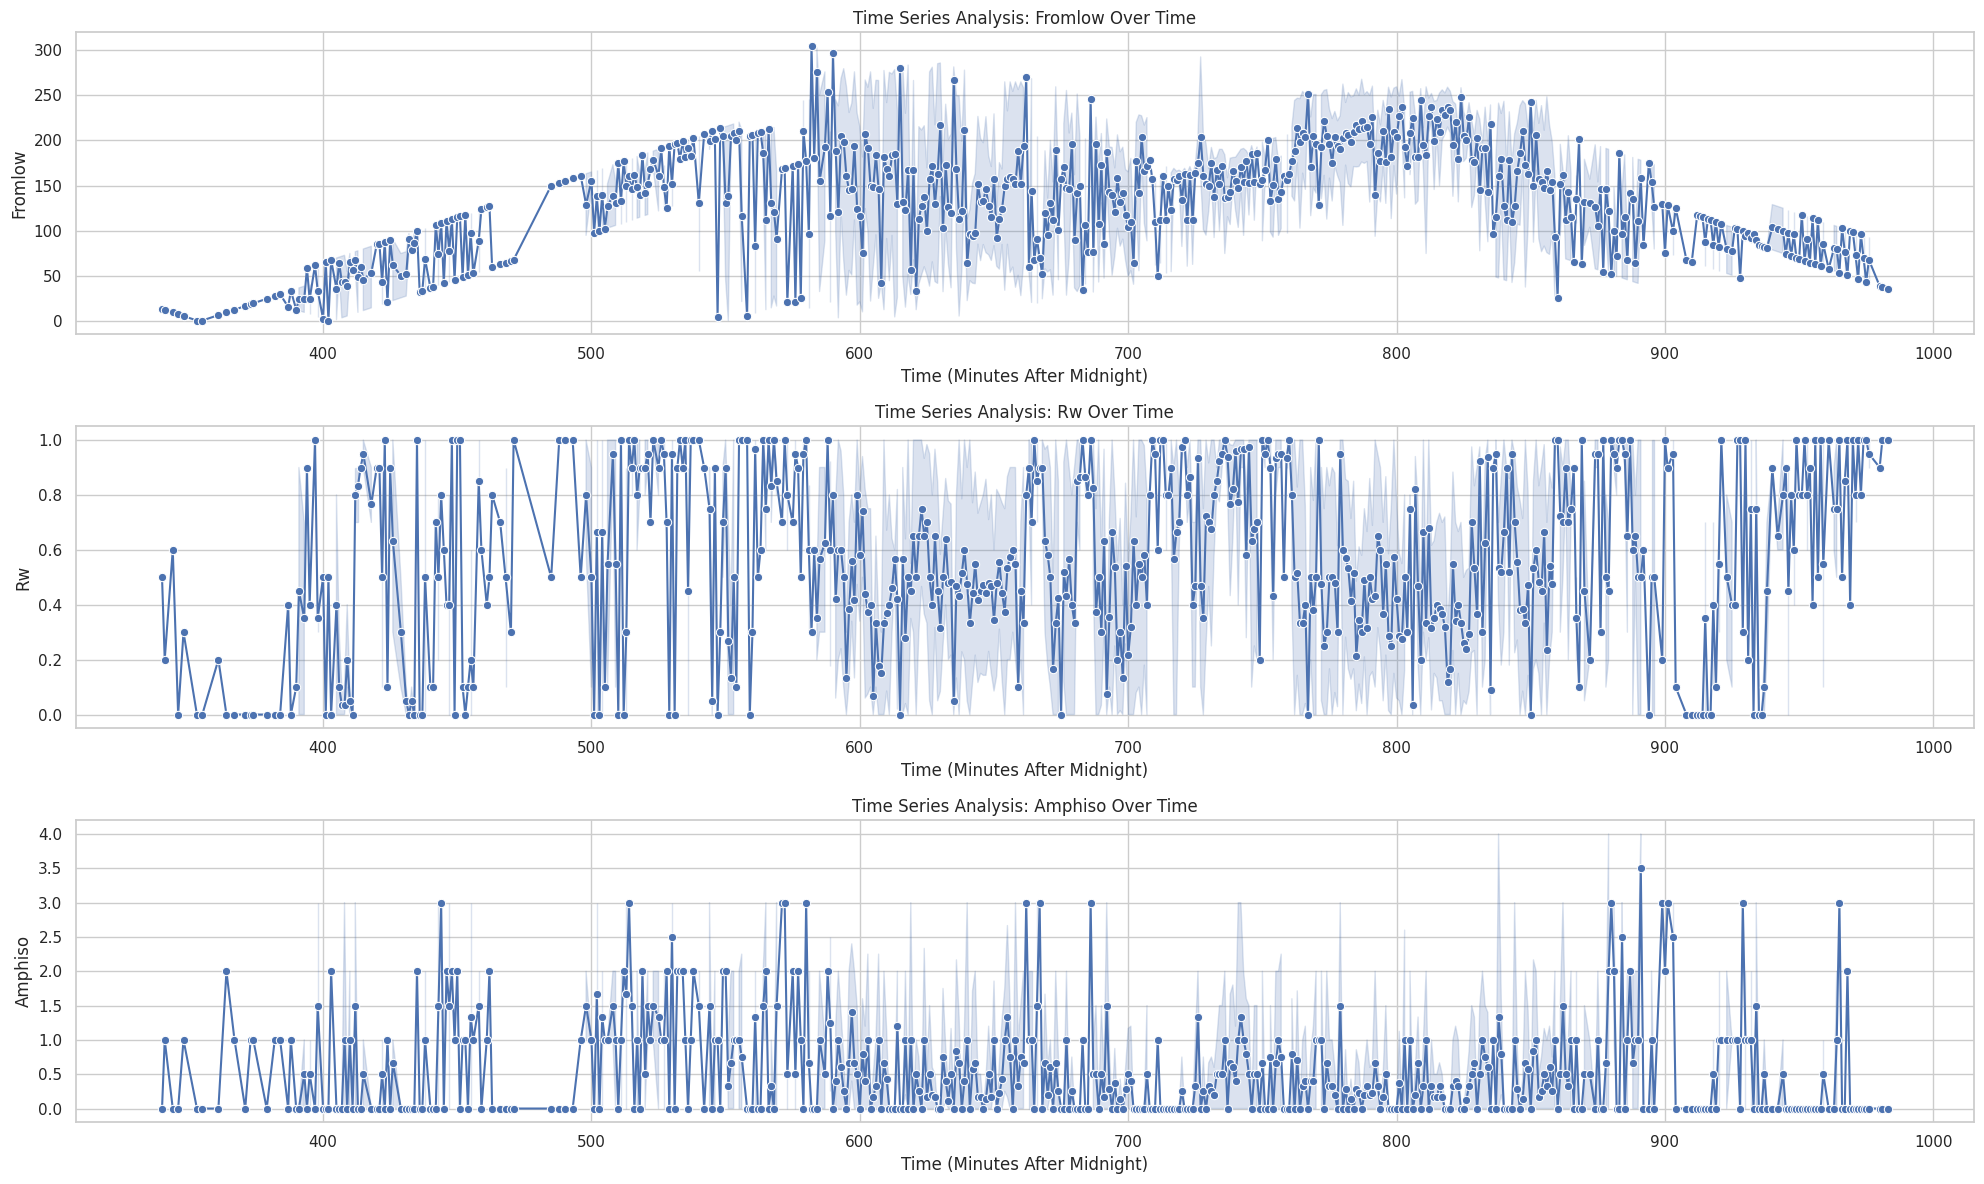

In [16]:
time_series_cols = ['Fromlow', 'Rw', 'Amphiso']

# Create subplots for each numerical feature over time
fig, axes = plt.subplots(nrows=len(time_series_cols), ncols=1, figsize=(20, 4 * len(time_series_cols)))

# Loop through each numerical column and create a line plot
for ax, col in zip(axes, time_series_cols):
    sns.lineplot(x='Time', y=col, data=df, marker='o', ax=ax)
    ax.set_title(f'Time Series Analysis: {col} Over Time')
    ax.set_xlabel('Time (Minutes After Midnight)')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()